### Example 8: Accuracy, Sensitivity, Precision and Related Metrics

### 2.1 What to do?
In this example we compute classification metrics such as accuracy, sensitivity (recall), specificity, precision (PPV), NPV, F1, likelihood ratios, and more using `statsmed.acc_sens()` on example data `ex8.csv`.

Steps:
- Load `ex8.csv`.
- Derive a binary ground-truth label based on whether the right-kidney volume from R2 is above its mean (1) or not (0) to mimic a dichotomous target.
- Create a binary prediction from R1 by thresholding its right-kidney volume at the same R2-based threshold, to simulate a classifier.
- Run `statsmed.acc_sens(gt, pred)` and review the printed metrics and returned array.

Notes:
- Ensure there are no NaN values before computing labels; zeros can be kept as valid values unless you choose a minimum volume filter for your use case.
- For real projects, replace this toy thresholding with your model’s predicted labels or scores.

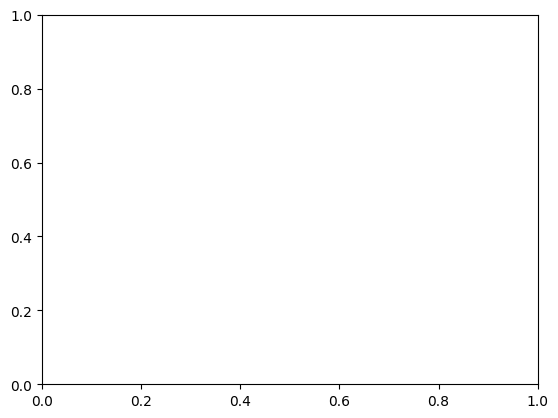

In [1]:
import pandas as pd
import numpy as np
from statsmed import statsmed

# Load example 8 data
data = pd.read_csv('ex8.csv', delimiter=',', on_bad_lines='skip')

# Build binary ground truth and predictions for right kidney
rk_r2 = data['kidney_right_volume_R2'].fillna(0)
rk_r1 = data['kidney_right_volume_R1'].fillna(0)

threshold = rk_r2.mean()

gt = (rk_r2 > threshold).astype(int).to_numpy()
pred = (rk_r1 > threshold).astype(int).to_numpy()


In [2]:
# Evaluate metrics for right kidney using binary GT and predictions
stats = statsmed.acc_sens(gt, pred)
stats

Size of total population: 1204
Number of positives: 508
Number of negatives: 696
Number of predicted positives: 508
Number of predicted negatives: 696
Number of true positives: 504
Number of true negatives: 692
Number of false positives: 4
Number of false negatives: 4
Prevalence: 42.19% (CI: 39.43% - 45.00%)
Accuaracy: 99.34% (CI: 98.69% - 99.66%)
Positive Predictive Value / Precision (PPV): 99.21% (CI: 97.99% - 99.69%)
Negative Predictive Value (NPV): 99.43% (CI: 98.53% - 99.78%)
False Omission Rate (FOR): 0.57% (CI: 0.22% - 1.47%)
False Discovery Rate (FDR): 0.79% (CI: 0.31% - 2.01%)
True Positive Rate / Sensitivity / Recall (TPR): 99.21% (CI: 97.99% - 99.69%)
True Negative Rate / Spezificity (TNR): 99.43% (CI: 98.53% - 99.78%)
False Positive Rate (FPR): 0.57% (CI: 0.22% - 1.47%)
False Negative Rate (FNR): 0.79% (CI: 0.31% - 2.01%)
Informedness / Youden's J statistic: 0.99
Prevalence threshold: 0.07
Balanced accuracy: 99.32%
F1 score: 0.99
Positive likelihood ratio: 172.63
Negative l

array([1.2040e+03, 5.0800e+02, 6.9600e+02, 5.0800e+02, 6.9600e+02,
       5.0400e+02, 6.9200e+02, 4.0000e+00, 4.0000e+00, 4.2000e-01,
       9.9000e-01, 9.9000e-01, 9.9000e-01, 1.0000e-02, 1.0000e-02,
       9.9000e-01, 9.9000e-01, 1.0000e-02, 1.0000e-02, 9.9000e-01,
       7.0000e-02, 9.9000e-01, 9.9000e-01, 1.7263e+02, 1.0000e-02,
       2.1798e+04, 9.8000e-01])

In [3]:
# Optional: Compare sensitivity and precision across two binary classifiers
# Here we simulate a second classifier by using the left-kidney R1 as "model B"
# and compare against the right-kidney R1 as "model A" using the same GT.

rk_l1 = data['kidney_left_volume_R1'].fillna(0)
pred_b = (rk_l1 > threshold).astype(int).to_numpy()

# Compare sensitivity and precision (independent two-proportion z-tests)
statsmed.compare_proportions_ind_sens_precision(gt, pred, gt, pred_b)


Two-proportion z-test for independent samples yields a p-value for the sensitivity of: p < 0.001 (z-value: 3.96)
Two-proportion z-test for independent samples yields a p-value for the precision of: p = 0.01 (z-value: 2.59)


array([7.60634166e-05, 9.55254656e-03])

We computed accuracy-related metrics for a toy binary task derived from right-kidney volumes. Replace the toy thresholding with your real labels/scores to obtain meaningful metrics for your problem.

You can optionally compare two classifiers’ sensitivity and precision using `statsmed.compare_proportions_ind_sens_precision` as shown above.

### 2.2 What to write?

In the statistical analysis section you may write:

"We evaluated classification performance using accuracy, sensitivity, specificity, precision (PPV), NPV, F1 score, likelihood ratios and related metrics (Wilson CIs)."

If you compare two classifiers’ sensitivity and precision, you may write:

"We compared sensitivity and precision between classifiers using two-proportion z-tests for independent samples."
